In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
data = pd.read_csv("adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K



# Partie 0 : Cleaning

<font color=black>Premiere nettoyage du dataset pour facilité l'analyse </font>

In [4]:
columns = data.columns.tolist()
for col in columns:
    data[col] = data[col].apply(lambda x: x if x != '?' else np.nan )

In [5]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

### Colonne : <font color=black>Workclass</font>

In [6]:
data.workclass.unique()

array([nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

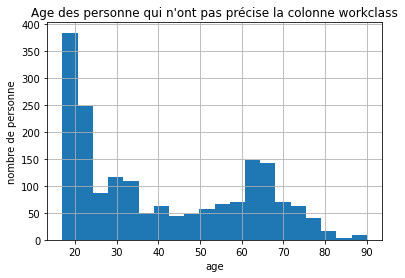

In [7]:
plt.xlabel('age')
plt.ylabel('nombre de personne')
plt.title("Age des personne qui n'ont pas précise la colonne workclass")
data[data.workclass.isnull()].age.hist(bins=20)

Au vus des resultats au-dessus on peut supposé que les Nan sont dû au fait que les personnes ne travaillent pas pour l'instant.Du coup On va remplir les NaN par 'NotWorking'.
<font color=red> Après réflexion, comme il y a peu de NaN et que le fait d'avoir un revenu alors qu'on ne travail pas n'est pas très logique,on va supprimé ces NaN </font>  

In [8]:
#data['workclass']  = data.workclass.apply(lambda x: x if x==x else 'Not-Working')
data.dropna(subset=['workclass'], axis = 0,inplace=True)

In [9]:
data.workclass.unique() 

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

### Colonne :<font color=black> Occupation </font>

In [10]:
"""
    Vu qu'on a supprimer les ligne où il y a des NaN 
    dans la colonne Workclass ce bout de code devient inutile
"""
#data[data.workclass == 'Not-Working'].occupation.unique()


"\n    Vu qu'on a supprimer les ligne où il y a des NaN \n    dans la colonne Workclass ce bout de code devient inutile\n"

In [11]:
data.occupation.unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv', nan], dtype=object)

In [12]:
data[data.occupation.isnull()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8874,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
13675,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
17089,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
21934,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
24483,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32331,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32338,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


occupation donne des informations sur le travail de l'individu. Les NaN peuvent être dû au fait qu'il y a des personnes qui ne travail pas du coup il faut remplacer les NaN pas une nouvelle catégorie que
j' appellerai 'unoccupied' <font color=red> Les 7 NaN de la colonne occupation sont les personnes qui n'ont jamais travailler, du coup on peut les supprimer </front> 

In [13]:
#data['occupation'] = data.occupation.apply(lambda x: x if x==x else 'Unoccupied')
data.dropna(subset=['occupation'],axis=0,inplace=True)

In [14]:
data.isnull().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation          0
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    556
income              0
dtype: int64

### Colonne :<font color=black> Native.country </font>

In [15]:
data[data['native.country'].isnull()].head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,NaN,>50K
65,60,Self-emp-inc,226355,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,2415,70,NaN,>50K
86,39,Self-emp-not-inc,218490,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,NaN,>50K
87,43,Federal-gov,156996,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,55,NaN,>50K


In [16]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


Je pense que Native conutry est une information que ne va pas influence sur les revenu et de plus il y a tres peu de NaN (0.017% du dataset) du coup on supprime cette colonne

In [17]:
data.drop('native.country',axis=1,inplace=True)

In [18]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
income            0
dtype: int64

In [19]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,<=50K


Pour plus de simplicité transformons les incomes en binaire

In [20]:
data['income'] = data.income.apply(lambda x: 0 if '<'in x else 1)

# Partie 1 : EDA

<b>Analyse de quelque colonne qui pouurai être utile </B>

## <font color=red>Est ce que l'age influence sur les revenu ?</font>

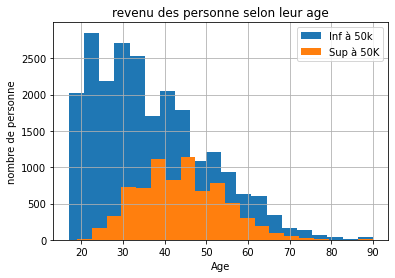

In [21]:
# histograme
data[data.income == 0].age.hist(bins=20)
data[data.income == 1].age.hist(bins=20)
plt.xlabel('Age')
plt.ylabel('nombre de personne')
plt.title('revenu des personne selon leur age')
plt.legend(('Inf à 50k','Sup à 50K'))

On peut voit que le nombre de personne ayant une revenu inf ou sup a 50k suivent une loi gaussienne

## <font color=red>Est ce que le type de travail qu'on fait influence sur les revenu ?</font>

In [22]:
data.workclass.unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

Text(0, 0.5, 'nombre de personne')

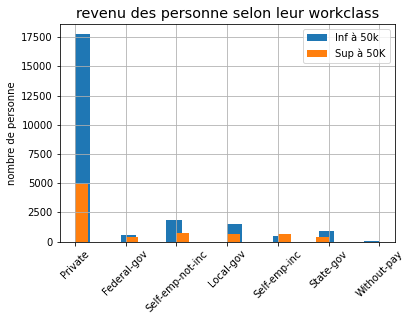

In [23]:
data[data.income == 0].workclass.hist(bins=20)
data[data.income == 1].workclass.hist(bins=20)
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=45)
plt.legend(('Inf à 50k','Sup à 50K'))
plt.title('revenu des personne selon leur workclass',fontsize='x-large')
plt.ylabel('nombre de personne')

## <font color=red>Est ce que les études qu'on fait influence sur les revenu ?</font>

Text(0.5, 1.0, 'revenu des personne selon leur éducation')

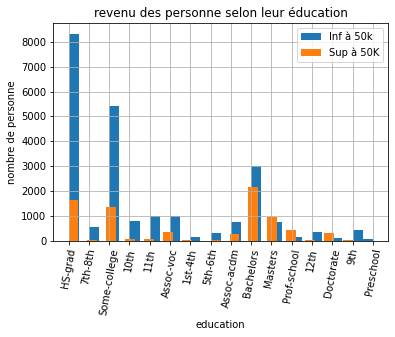

In [24]:
data[data.income == 0].education.hist(bins=30,align='mid')
data[data.income == 1].education.hist(bins=30,align='mid')
plt.xticks(rotation=80)
plt.ylabel('nombre de personne')
plt.xlabel('education')
plt.legend(('Inf à 50k','Sup à 50K'))
plt.title('revenu des personne selon leur éducation')

On voit que selon le degré d'étude on a plus de chance d'avoir un salaire superieur a 50K. Il faudrai créer une relation d'ordre entre les différent degrés d'études. Cette relation d'ordre est donne avec la colonne education.num du coup on peut supprimer la colonne education.

## <font color=red>Est ce que la couleur de peau influence sur les revenu ?</font>

Text(0.5, 1.0, 'Revenu des personne selon leur race')

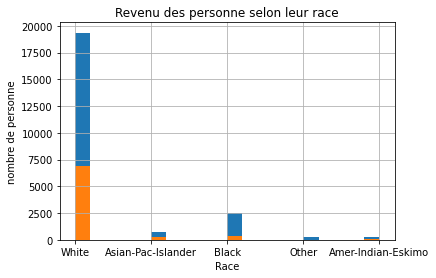

In [25]:
data[data.income == 0].race.hist(bins=20,align='mid')
data[data.income == 1].race.hist(bins=20,align='mid')
plt.xlabel('Race')
plt.ylabel('nombre de personne')
plt.title('Revenu des personne selon leur race')

In [26]:
data.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

La couleur de peau influence sur les revenu. De ce fait une relation d'ordre se crée.

## <font color=red>Est ce que la famille influence sur les revenu ?</font>

In [27]:
data['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

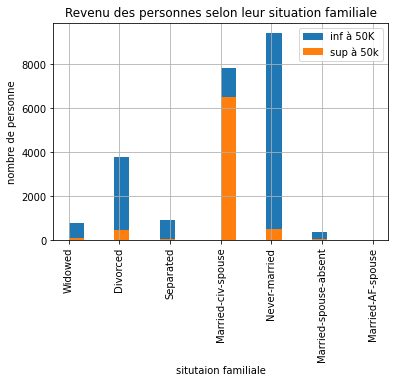

In [28]:
data[data.income == 0]['marital.status'].hist(bins=20)
data[data.income == 1]['marital.status'].hist(bins=20)
plt.xticks(rotation=90)
plt.ylabel('nombre de personne')
plt.xlabel('situtaion familiale')
plt.title('Revenu des personnes selon leur situation familiale')
plt.legend(('inf à 50K','sup à 50k'))

In [29]:
data['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

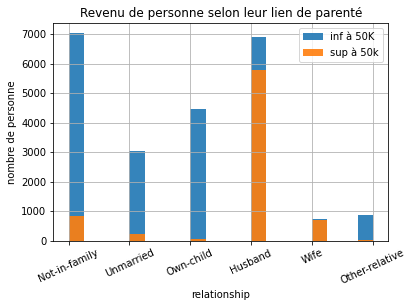

In [30]:
data[data.income == 0].relationship.hist(bins=20,alpha=0.9,align='mid')
data[data.income == 1].relationship.hist(bins=20,alpha=0.9,align='mid')
plt.xticks(rotation=25)
plt.ylabel('nombre de personne')
plt.xlabel('relationship')
plt.title('Revenu de personne selon leur lien de parenté')
plt.legend(('inf à 50K','sup à 50k'))

In [31]:
data.relationship.unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

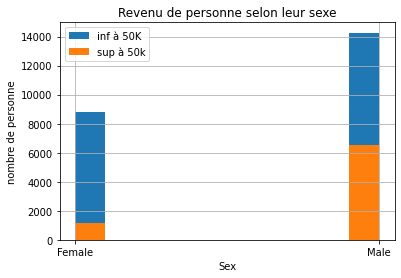

In [32]:
data[data.income == 0].sex.hist(align='mid')
data[data.income == 1].sex.hist(align='mid')
#plt.xticks(rotation=25)
plt.ylabel('nombre de personne')
plt.xlabel('Sex')
plt.title('Revenu de personne selon leur sexe')
plt.legend(('inf à 50K','sup à 50k'))

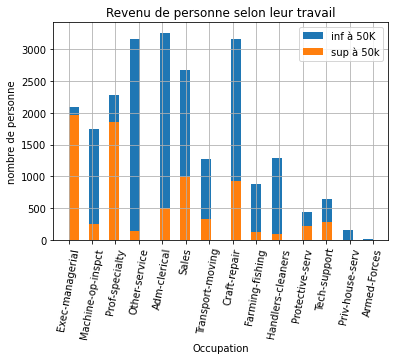

In [33]:
data[data.income == 0].occupation.hist(bins=30,align='mid')
data[data.income == 1].occupation.hist(bins=30,align='mid')
plt.xticks(rotation=80)
plt.ylabel('nombre de personne')
plt.xlabel('Occupation')
plt.title('Revenu de personne selon leur travail')
plt.legend(('inf à 50K','sup à 50k'))


# Partie 2 : Preprocessing

In [34]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,0


In [35]:
data.drop('education',axis=1,inplace=True)

In [56]:
sorted(data['education.num'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [36]:
data.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,0
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,0
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,0


In [37]:
data.occupation.unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [38]:
import prepro as pp 

In [39]:
pp.transform(data)

Workclass column transformed
Sex Column transformed
Relationship column transformed
Race column transformed
Martial Status column transformed
Occupation column transformed


In [40]:
data.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
1,82,5,132870,9,4,0,2,0,1,0,4356,18,0
3,54,5,140359,4,3,8,3,0,1,0,3900,40,0
4,41,5,264663,10,5,1,4,0,1,0,3900,40,0
5,34,5,216864,9,3,11,3,0,1,0,3770,45,0
6,38,5,150601,6,5,4,3,0,0,0,3770,40,0


In [41]:
data.corr().style.background_gradient(cmap='coolwarm')

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
age,1,-0.205066,-0.0765397,0.0435671,-0.110281,-0.133124,-0.383336,-0.0303278,-0.0821167,0.0803922,0.0604089,0.101879,0.242431
workclass,-0.205066,1,0.0410379,-0.154787,0.0953975,0.148184,0.137665,0.0107877,0.0716317,-0.0697357,-0.0424757,-0.120952,-0.151066
fnlwgt,-0.0765397,0.0410379,1,-0.043509,0.0216077,0.0175113,0.0344762,0.089015,-0.0265686,-0.000188977,-0.0100105,-0.0228105,-0.00944568
education.num,0.0435671,-0.154787,-0.043509,1,-0.0987776,-0.435761,-0.14718,-0.0785989,-0.0074431,0.124247,0.0793208,0.151241,0.33464
marital.status,-0.110281,0.0953975,0.0216077,-0.0987776,1,0.139518,0.637997,0.13236,0.434936,-0.0703064,-0.0675779,-0.172369,-0.378875
occupation,-0.133124,0.148184,0.0175113,-0.435761,0.139518,1,0.203716,0.119004,0.0463892,-0.094863,-0.0758415,-0.167142,-0.301335
relationship,-0.383336,0.137665,0.0344762,-0.14718,0.637997,0.203716,1,0.120541,0.275989,-0.0828104,-0.0812867,-0.258945,-0.398294
race,-0.0303278,0.0107877,0.089015,-0.0785989,0.13236,0.119004,0.120541,1,0.112538,-0.018831,-0.0263973,-0.057256,-0.0975671
sex,-0.0821167,0.0716317,-0.0265686,-0.0074431,0.434936,0.0463892,0.275989,0.112538,1,-0.0477575,-0.0470098,-0.230321,-0.216626
capital.gain,0.0803922,-0.0697357,-0.000188977,0.124247,-0.0703064,-0.094863,-0.0828104,-0.018831,-0.0477575,1,-0.0323325,0.0795476,0.221871


Il y a une relation entre :
- relationship et marital status (forte)
- occupation et relationship (moyen)
- sex et marital status(moyen)
- relationship et age (moyen)
- occupation et education (moyen)


supprimons la colonne relationship 

In [42]:
data.drop('relationship',axis=1, inplace=True)

In [43]:
data.corr().style.background_gradient(cmap='coolwarm')

,age,workclass,fnlwgt,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,income
age,1,-0.205066,-0.0765397,0.0435671,-0.110281,-0.133124,-0.0303278,-0.0821167,0.0803922,0.0604089,0.101879,0.242431
workclass,-0.205066,1,0.0410379,-0.154787,0.0953975,0.148184,0.0107877,0.0716317,-0.0697357,-0.0424757,-0.120952,-0.151066
fnlwgt,-0.0765397,0.0410379,1,-0.043509,0.0216077,0.0175113,0.089015,-0.0265686,-0.000188977,-0.0100105,-0.0228105,-0.00944568
education.num,0.0435671,-0.154787,-0.043509,1,-0.0987776,-0.435761,-0.0785989,-0.0074431,0.124247,0.0793208,0.151241,0.33464
marital.status,-0.110281,0.0953975,0.0216077,-0.0987776,1,0.139518,0.13236,0.434936,-0.0703064,-0.0675779,-0.172369,-0.378875
occupation,-0.133124,0.148184,0.0175113,-0.435761,0.139518,1,0.119004,0.0463892,-0.094863,-0.0758415,-0.167142,-0.301335
race,-0.0303278,0.0107877,0.089015,-0.0785989,0.13236,0.119004,1,0.112538,-0.018831,-0.0263973,-0.057256,-0.0975671
sex,-0.0821167,0.0716317,-0.0265686,-0.0074431,0.434936,0.0463892,0.112538,1,-0.0477575,-0.0470098,-0.230321,-0.216626
capital.gain,0.0803922,-0.0697357,-0.000188977,0.124247,-0.0703064,-0.094863,-0.018831,-0.0477575,1,-0.0323325,0.0795476,0.221871
capital.loss,0.0604089,-0.0424757,-0.0100105,0.0793208,-0.0675779,-0.0758415,-0.0263973,-0.0470098,-0.0323325,1,0.0539609,0.151461



Les colonnes Marital Status, occupation, education et sex sont des colonne que je trouve qu'ils sont important et donc il ne faudrait pas les supprimer

# Partie 3 : Modelisation

Dans cette partie nous allons essayer de trouver le bon model pour predire correctement la colonne Income.

<font color=blue> rows </font>: 30718   
<font color=green> columns </font>: 12

<font color=Red> feature </font>:
- age
- workclass
- fnlwgt
- education.num
- marital.status
- occupation
- race
- sex
- capital.gain
- capital.loss
- hours.per.week

<font color=green>Target </font>:
- Income



In [44]:
feature = [
    'age', 'workclass', 'fnlwgt', 'education.num',
    'marital.status', 'occupation', 'race', 'sex',
    'capital.gain', 'capital.loss', 'hours.per.week'
]

target = 'income'


In [45]:
# Les Classifieur
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from matplotlib import pyplot

In [46]:
models=[
    ('SVC',SVC()),
    ('RandomForest',RandomForestClassifier()),
    ('CART',DecisionTreeClassifier()),
    ('Knn',KNeighborsClassifier()),
    ('Logit',LogisticRegression())

]

C:\Users\osman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


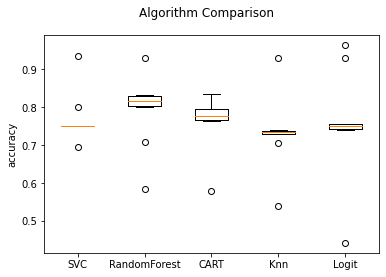

In [47]:
results = []
names = []

for name, clf in models:
    rslt = cross_val_score(clf, data[feature],data[target], cv=10,scoring='accuracy',n_jobs=-1)
    results.append(rslt)
    names.append(name)
    


fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
pyplot.ylabel('accuracy')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [48]:
results[0]

array([0.69596354, 0.93391927, 0.79947917, 0.75097656, 0.75097656,
       0.75097656, 0.75097656, 0.75097656, 0.75089547, 0.75089547])

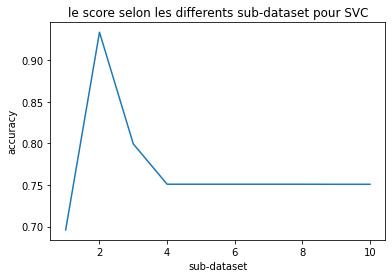

In [55]:
plt.xlabel('sub-dataset')
plt.ylabel('accuracy')
plt.title('le score selon les differents sub-dataset pour SVC')
plt.plot(range(1,11),results[0])

In [49]:
results[1]

array([0.58365885, 0.92936198, 0.70735677, 0.80078125, 0.82617188,
       0.81022135, 0.83040365, 0.81998698, 0.83099967, 0.81211332])

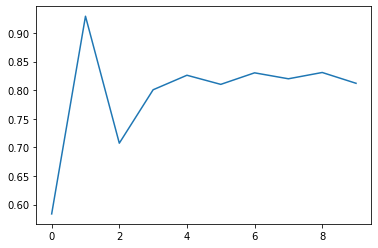

In [52]:
plt.plot(range(0,10),results[1])

# Partie 4 : Model Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = RandomForestClassifier()

In [ ]:
param_grid = {
    'n_estimators':range(200,401,50),
    'max_depth' : [3,4,5,6],
    'criterion' : ['gini','entropy'],
    'warm_start' : [False, True],
}

grid = GridSearchCV(model, param_grid=param_grid, cv=10, scoring='accuracy', return_train_score=False)

In [ ]:
grid.